In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from keras.regularizers import l2



data = fetch_california_housing(as_frame=True)
df = data.frame

# Mostrar las primeras filas del dataset
print('Primeras filas del dataset:')
print(df.head())

# Ver información general del dataset
print('Información del dataset: ')
print(df.info())

# Ver estadísticas descriptivas
print('Estadísticas descriptivas del dataset:')
print(df.describe())

Primeras filas del dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
Información del dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3 

Limpieza del dataset

In [2]:
df.dropna(inplace=True) #Elimina valores nulos
df_sin_dups = df.drop_duplicates() #Elimina duplicados y los guarda en otro dataset
print('Esta es la información del dataset ya sin duplicados y valores nulos como NaN')
print(df_sin_dups)

Esta es la información del dataset ya sin duplicados y valores nulos como NaN
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.1622

Dividamos los datos! :D

In [5]:
# Separar características (X) y objetivo (y)
X = df.drop(columns='MedHouseVal')  # Eliminar la columna objetivo pero toma las demás columnas
y = df['MedHouseVal']  # Columna objetivo

# Separar características (X) y objetivo (y)
X = df.drop(columns='MedHouseVal')  # Eliminar la columna objetivo pero toma las demás columnas
y = df['MedHouseVal']  # Columna objetivo

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Tamaño de los conjuntos de datos:')
print("Conjunto de entrenamiento:", X_train.shape)
print("Conjunto de prueba:", X_test.shape)

Tamaño de los conjuntos de datos:
Conjunto de entrenamiento: (16512, 8)
Conjunto de prueba: (4128, 8)


Escalando los datos

In [6]:
# Escalador estándar
scaler = StandardScaler()

# Ajustar y transformar los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de prueba
X_test_scaled = scaler.transform(X_test)

print("Datos escalados correctamente.")

Datos escalados correctamente.


Entrenemos el modelo y evaluemos

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 1604.5063 - mae: 16.3372 - val_loss: 2.3432 - val_mae: 1.0141
Epoch 2/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.4056 - mae: 1.0245 - val_loss: 2.4264 - val_mae: 1.1189
Epoch 3/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5546 - mae: 1.4675 - val_loss: 2.3646 - val_mae: 1.1212
Epoch 4/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9194 - mae: 0.9011 - val_loss: 3.4554 - val_mae: 1.3569
Epoch 5/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0249 - mae: 0.9020 - val_loss: 3.0343 - val_mae: 1.2924
Epoch 6/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10.7974 - mae: 1.6510 - val_loss: 1.8213 - val_mae: 0.9073
Epoch 7/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2062 - mae: 0.9725 - val_loss: 1.4574 - val_mae: 0.7314
Epoch 8/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7609 - mae: 0.8380 - val_loss: 1.5714 - val_mae: 0.7353
Epoch 9/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s

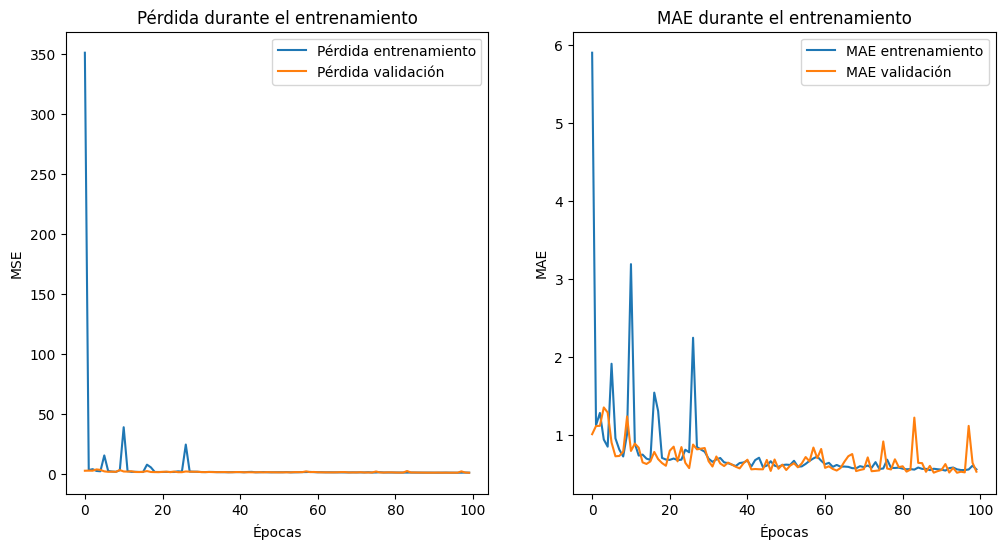

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Predicción: 0.46, Valor real: 0.48
Predicción: 0.46, Valor real: 0.46
Predicción: 0.46, Valor real: 5.00
Predicción: 0.67, Valor real: 2.19
Predicción: 0.46, Valor real: 2.78
Predicción: 0.53, Valor real: 1.59
Predicción: 0.59, Valor real: 1.98
Predicción: 0.45, Valor real: 1.57
Predicción: 0.57, Valor real: 3.40
Predicción: 0.99, Valor real: 4.47


In [7]:
# 1. Definir la arquitectura del modelo
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l2(0.01)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1, activation='linear')  # Capa de salida
])

# 2. Compilar el modelo
model.compile(
    optimizer=Adam(learning_rate=0.001),
        loss='mse',        # Función de pérdida: Error cuadrático medio (MSE)
    metrics=['mae']    # Métrica adicional: Error absoluto medio (MAE)
)

# 3. Entrenar el modelo
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=64,
                    verbose=1)


# 4. Evaluar el modelo en el conjunto de prueba
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)

print(f"Pérdida (MSE) en prueba: {test_loss:.4f}")
print(f"Error absoluto medio (MAE) en prueba: {test_mae:.4f}")

# 5. Visualizar el historial de entrenamiento
plt.figure(figsize=(12, 6))

# Pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()

# Métrica MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='MAE entrenamiento')
plt.plot(history.history['val_mae'], label='MAE validación')
plt.title('MAE durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()

plt.show()

# 6. Hacer predicciones
predictions = model.predict(X_test_scaled)

# Mostrar algunas predicciones vs valores reales
import numpy as np
for i in range(10):  # Mostrar las primeras 10 predicciones
    print(f"Predicción: {predictions[i][0]:.2f}, Valor real: {y_test.iloc[i]:.2f}")



La justificación de la arquitectura de mi modelo es la siguiente:


*   Número de capas: 2-3 capas ocultas dan buena capacidad al modelo de aprender patrones sin llegar al sobreajuste
*   Funciones de activación: Función ReLU en capas ocultas y función lineal en la salida. La función líneal es adecuada para problemas de regresión, ya que permite al modelo producir cualquier valor numérico
*   Función de costo: Error cuadrático medio (MSE) porque penaliza grandes errores más severamente que pequeños errores, lo que es ideal en problemas de regresión.
*   Número de épocas: 100 épocas porque permite que el modelo alcance estabilidad sin llegar a un sobreajuste
*   Tamaño del batch: 32 porque un batch mas grande hace el entrenamiento lento y menos sensible a variaciones de datos.
*   Número de neuronas de la capa de entrada: igual que el número de características de entrada del dataset, así cada neurona de entrada representa una característica del dataset, asegurando que la red reciba toda la información necesaria para aprender.
*   Número de neuronas en la capa de salida: 1 neurona pues como quiero predecir un valor numérico, una sola neurona es suficiente para esta tarea.
